In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [78]:
df=pd.read_csv('/content/netflix_titles.csv')

In [79]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [80]:
df.shape

(8807, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [82]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [83]:
# Loại bỏ dữ liệu trùng lặp
df.drop_duplicates(inplace=True)

In [84]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [85]:
# Xử lý giá trị thiếu
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown', 'date_added': 'Unknown', 'rating': 'Unknown', 'duration': 0}, inplace=True)

In [86]:
# Thay thế giá trị 'Unknown' trong cột 'date_add' bằng ngày mặc định
df['date_added'].replace('Unknown', '1900-01-01', inplace=True)

#  Chuyển đổi cột 'date_add' sang định dạng ngày giờ
df['date_added'] = pd.to_datetime(df['date_added'])

In [87]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Q1. Tỷ lệ phim so với chương trình truyền hình trên Netflix là bao nhiêu?

In [88]:
#Phân tích phân phối loại chương trình
type_counts = df['type'].value_counts()
print(type_counts)

Movie      6131
TV Show    2676
Name: type, dtype: int64


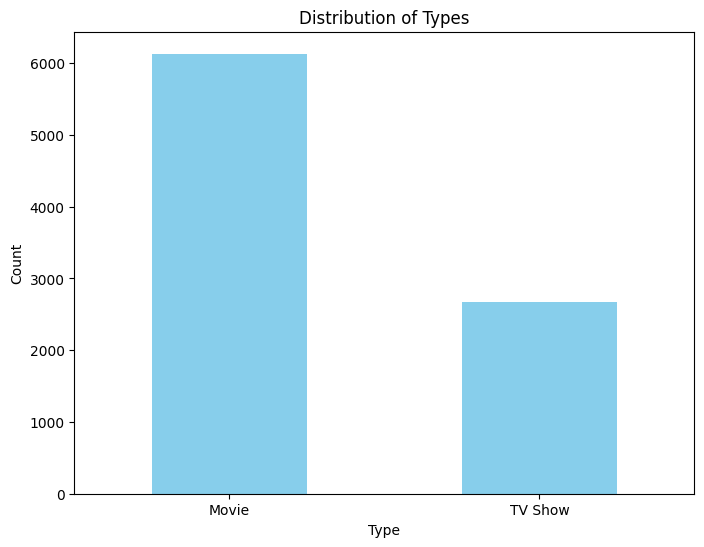

In [89]:
# Trực quan hóa phân phối loại chương trình
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

top 10 loại phim theo quốc gia

In [90]:
# Phân tích phân phối theo quốc gia
country_counts = df['country'].value_counts().head(10)
print(country_counts)


United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64


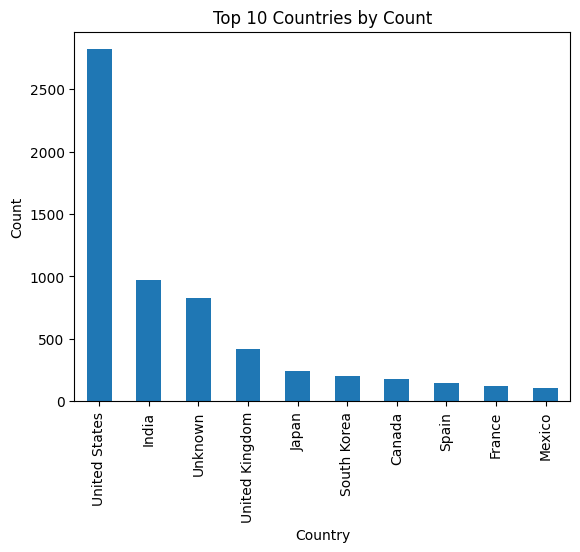

In [91]:
# Trực quan hóa phân phối theo quốc gia
country_counts.plot(kind='bar', title='Top 10 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Có bao nhiêu bộ phim được phát hành vào mỗi năm?

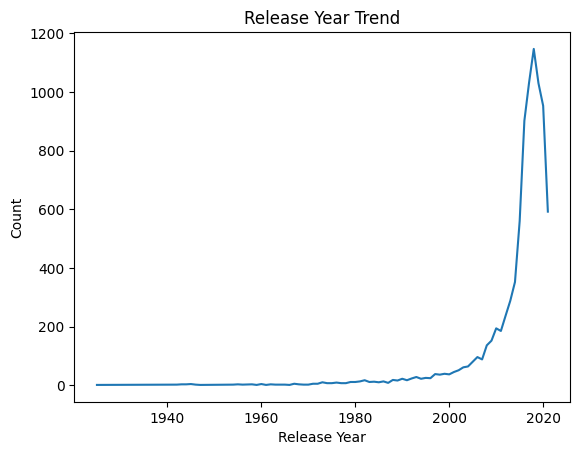

In [92]:
# Phân tích xu hướng phát hành theo năm
release_year_counts = df['release_year'].value_counts().sort_index()
# Trực quan hóa xu hướng phát hành theo năm
release_year_counts.plot(kind='line', title='Release Year Trend')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

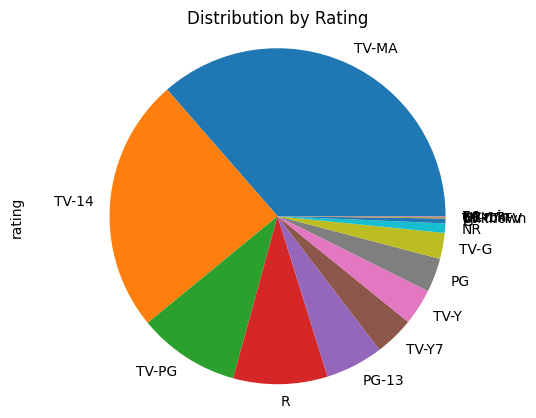

In [93]:
# Phân tích phân loại tuổi
rating_counts = df['rating'].value_counts()
# Trực quan hóa phân loại tuổi
rating_counts.plot(kind='pie', title='Distribution by Rating')
plt.axis('equal')  # để làm cho biểu đồ tròn
plt.show()

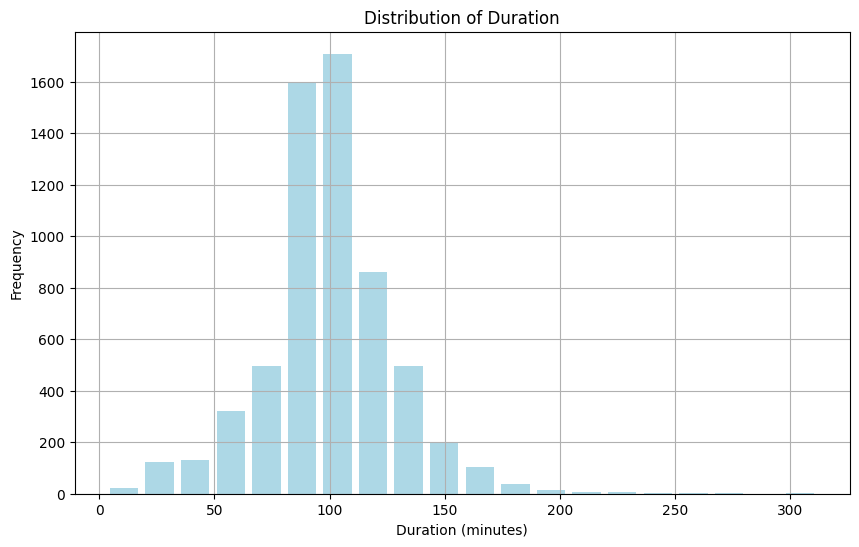

In [94]:
# Convert 'duration' column to numeric values
df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')

# Drop NaN values
df.dropna(subset=['duration'], inplace=True)

# Trực quan hóa thời lượng
plt.figure(figsize=(10, 6))
df['duration'].hist(bins=20, color='lightblue', rwidth=0.8)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()


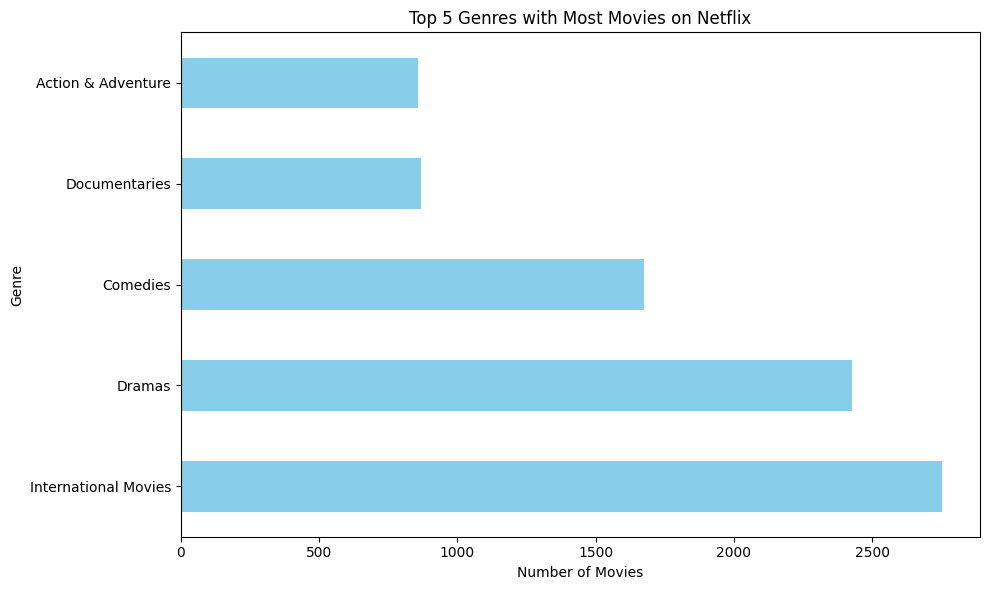

In [95]:
# Đếm số lần xuất hiện của từng thể loại
genre_counts = df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts()

# Lấy top 5 thể loại phim nhiều nhất
top_5_genres = genre_counts.head(5)

# Vẽ biểu đồ top 5 thể loại có nhiều phim nhất
plt.figure(figsize=(10, 6))
top_5_genres.plot(kind='barh', color='skyblue')
plt.title('Top 5 Genres with Most Movies on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
